<a href="https://colab.research.google.com/github/Dineshchowdary9999/Case1E2/blob/main/sdc_29_1_25_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas numpy seaborn matplotlib wordcloud scikit-learn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import wordcloud
import random

In [25]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(url,sep=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [24]:
x=data.drop('quality',axis=1)
y=data['quality']
#we will make the output to binary
y=np.where(y>=7,1,0)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=45)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

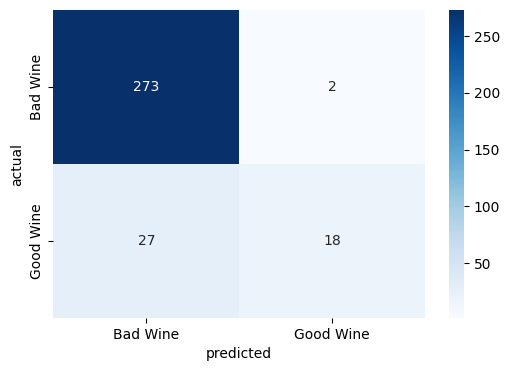

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cnf=confusion_matrix(y_test,prediction)
plt.figure(figsize=(6,4))
sns.heatmap(cnf,annot=True,fmt='d',cmap='Blues',xticklabels=['Bad Wine','Good Wine'],yticklabels=['Bad Wine','Good Wine'])
plt.xlabel("confusion matrix")
plt.ylabel("actual")
plt.xlabel("predicted")
plt.show()

In [30]:
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       275
           1       0.90      0.40      0.55        45

    accuracy                           0.91       320
   macro avg       0.91      0.70      0.75       320
weighted avg       0.91      0.91      0.89       320

0.909375


In [31]:
fi=model.feature_importances_
features=x.columns
importance_df=pd.DataFrame({'Features':features,'Importance':fi}).sort_values(by='Importance',ascending=False)

<ipython-input-35-0b93bc43ded6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance",y="Features",data=importance_df,palette='viridis')


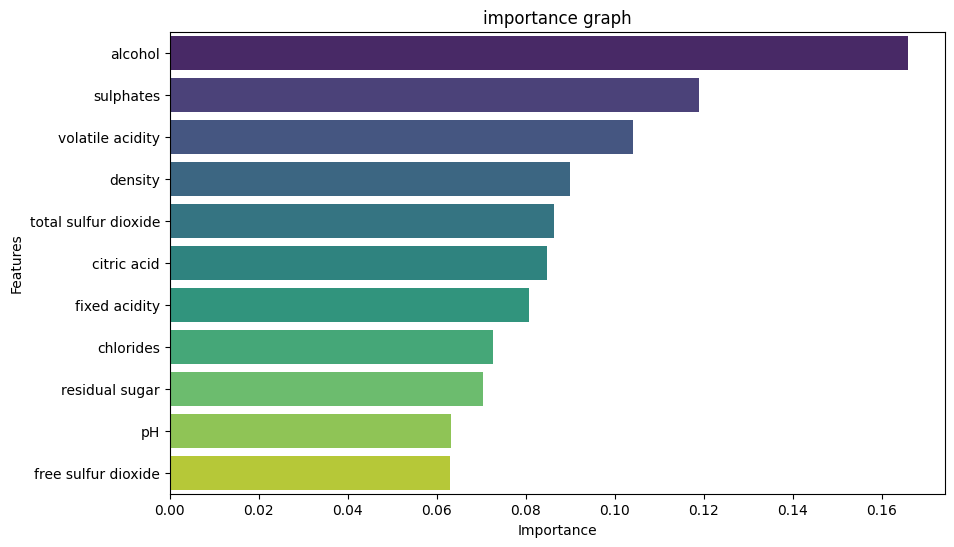

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_df,palette='viridis')
plt.title("importance graph")
plt.show()

In [ ]:
user_input=[]
for col in x.columns:
    value=float(input(f"{col}: "))
    user_input.append(val)
    user_input=scaler.transform([user_input])
    prediction=model.predict(user_input)
    probability=model.predict_proba(user_input)
    #output logic here
    print("\n----prediction Results----")
    if prediction[0]==1:
      print("this is a **GOOD quality wine!**")
      if prediction[0]==0:
        print("\n Insights to Improve Wine")